# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import sklearn
import imblearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [29]:
data = pd.read_csv("assignment3_creditcard.csv")

In [30]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [32]:
# 범주형 종속 변수 categoru로 타입 변경 (int->Category)
data["Class"]=data["Class"].astype("category")

In [33]:
# 결측치 확인, 존재하지 않음
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [34]:
# 중복 데이터 존재,제거
print(data.duplicated().sum()) 
data.drop_duplicates(subset=None, inplace=True)

223


In [35]:
# 변수 X,y 분리
X=data.iloc[:,:-1]
y=data["Class"]

In [36]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,...,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000
mean,-0.021078,0.050501,-0.033933,0.036260,-0.037231,-0.010912,-0.044176,0.009609,-0.020753,-0.038229,...,0.007962,0.003268,0.007740,0.001475,-0.005985,-0.002668,-0.003397,-0.001190,0.001433,0.001652
std,2.012927,1.606514,1.734503,1.481132,1.477321,1.330209,1.417381,1.290288,1.130844,1.234611,...,0.828499,0.720274,0.783047,0.732164,0.592159,0.602652,0.518538,0.484064,0.391874,0.296178
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.920429,-0.579376,-0.887420,-0.846002,-0.717758,-0.763754,-0.567564,-0.206880,-0.665250,-0.543397,...,-0.461042,-0.209897,-0.225010,-0.537482,-0.161264,-0.357389,-0.319970,-0.327768,-0.070800,-0.052136
50%,0.006006,0.075781,0.188016,-0.009723,-0.062947,-0.272315,0.037170,0.021861,-0.057595,-0.096115,...,0.002501,-0.061980,-0.027688,0.009468,-0.011512,0.038970,0.017441,-0.057042,0.002269,0.011250
75%,1.313719,0.810654,1.037127,0.772464,0.608793,0.389246,0.561912,0.325880,0.604288,0.464881,...,0.470339,0.132688,0.185065,0.527921,0.146393,0.434600,0.351782,0.241387,0.092259,0.079672
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


In [37]:
y.value_counts()
# 불균형 분포

0    28217
1      238
Name: Class, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21341, 28) (7114, 28) (21341,) (7114,)


In [39]:
#Imbalanced Ratio - 샘플링 
print('train data label ratio : ')
print(y_train.value_counts()/y_train.shape[0]*100)
print('train data label ratio : ')
print(y_test.value_counts()/y_test.shape[0]*100)

train data label ratio : 
0    99.184668
1     0.815332
Name: Class, dtype: float64
train data label ratio : 
0    99.100365
1     0.899635
Name: Class, dtype: float64


In [40]:
# 로지스틱 선형회귀 모형
model = LogisticRegression()
# 모델링 
def modeling(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    metrics(y_test,y_pred)
    
# 평가 지표
def metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_score = roc_auc_score(y_test,y_pred,average='macro')
    
    print('accuracy : {0:.3f}'.format(accuracy))
    print('precision : {0:.3f}'.format(precision))
    print('recall: {0:.3f}'.format(recall))
    print('f1-score : {0:.3f}'.format(f1))
    print('auc : {0:.3f}'.format(roc_score))
    
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)),annot=True,cmap=plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    print(classification_report(y_test, y_pred))

accuracy : 0.998
precision : 0.917
recall: 0.859
f1-score : 0.887
auc : 0.929
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7050
           1       0.92      0.86      0.89        64

    accuracy                           1.00      7114
   macro avg       0.96      0.93      0.94      7114
weighted avg       1.00      1.00      1.00      7114



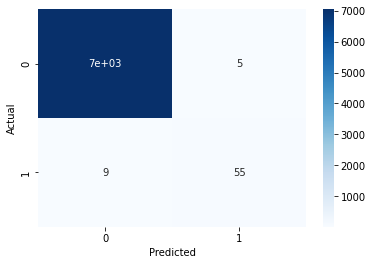

In [41]:
modeling(model,X_train,X_test,y_train,y_test)

#### 평가 지표
: minor class(1)를 잘 분류해내는 지표 기준 
- Accuracy : 분포 편향(불균형)되어 있어 평가 지표로 적합하지 않음
- Precision
- **Recall** : y가 '사기'를 의미하는 변수인 만큼 실제 1값 중 모델이 1로 분류한 것의 비율인 Recall이 Precision보다 더 중요하다고 판단
- **F1 score** : 불균형한 데이터에서 잘 동작
- AUC : 1에 가까울수록 좋음

---

In [42]:
# feature 계수 확인
coef = pd.DataFrame({"feature_names":X.columns, "coefficient":model.coef_[0]})
coef.sort_values(by=['coefficient'])

,feature_names,coefficient
9,V10,-0.742669
13,V14,-0.649601
26,V27,-0.583740
25,V26,-0.359762
11,V12,-0.308203
17,V18,-0.284610
19,V20,-0.264857
7,V8,-0.218650
15,V16,-0.209438
27,V28,-0.164789


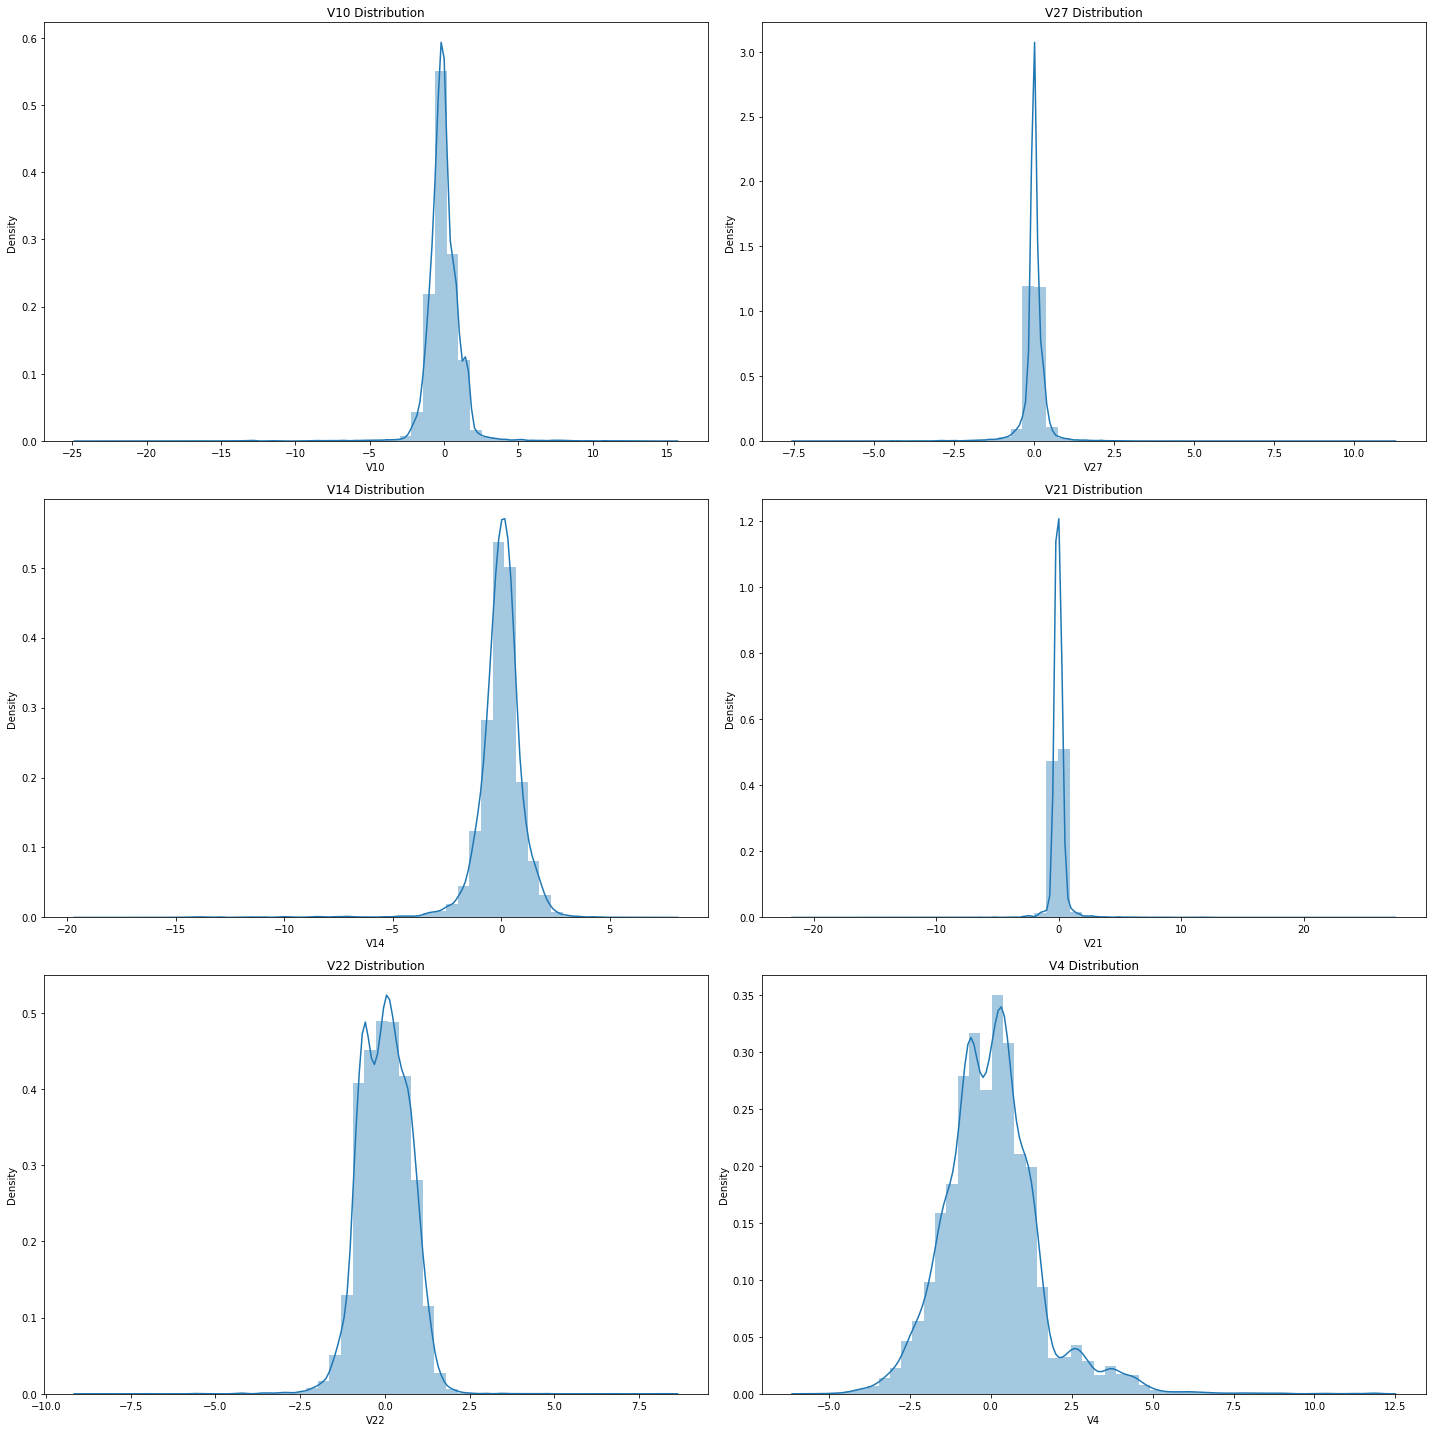

In [43]:
# 큰 coef값을 가지는 변수들만 정규성 판단 , scaling 진행 불필요해보임
fig=plt.figure(figsize=(20,20))
rows=3
cols=2
features=['V10','V27','V14','V21','V22','V4']
for i, feature in enumerate(features):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.distplot(data[feature],ax=ax)
    ax.set_title(feature+" Distribution")
fig.tight_layout()  
plt.show()

---

### Sampling

### 1. Over-sampling
#### SMOTE

In [55]:
# Oversampling : SMOTE
smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 전 train data: ', X_train.shape, y_train.shape)
print('SMOTE 후 train data : ', X_train_over.shape, y_train_over.shape)
print('레이블 값 분포 : \n', pd.Series(y_train_over).value_counts())

SMOTE 전 train data:  (21341, 28) (21341,)
SMOTE 후 train data :  (42334, 28) (42334,)
레이블 값 분포 : 
 0    21167
1    21167
Name: Class, dtype: int64


accuracy : 0.968
precision : 0.208
recall: 0.922
f1-score : 0.340
auc : 0.945
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7050
           1       0.21      0.92      0.34        64

    accuracy                           0.97      7114
   macro avg       0.60      0.95      0.66      7114
weighted avg       0.99      0.97      0.98      7114



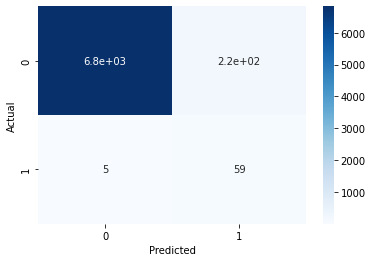

In [56]:
modeling(model,X_train_over,X_test,y_train_over,y_test)
#재현율(recall)이 높아진 것을 확인할 수 있음

#### Random OverSampling

In [46]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('ROS 전 train data: ', X_train.shape, y_train.shape)
print('ROS 후 train data : ', X_train_ros.shape, y_train_ros.shape)
print('레이블 값 분포 : \n', pd.Series(y_train_ros).value_counts())

ROS 전 train data:  (21341, 28) (21341,)
ROS 후 train data :  (42334, 28) (42334,)
레이블 값 분포 : 
 0    21167
1    21167
Name: Class, dtype: int64


accuracy : 0.971
precision : 0.225
recall: 0.922
f1-score : 0.362
auc : 0.947
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7050
           1       0.23      0.92      0.36        64

    accuracy                           0.97      7114
   macro avg       0.61      0.95      0.67      7114
weighted avg       0.99      0.97      0.98      7114



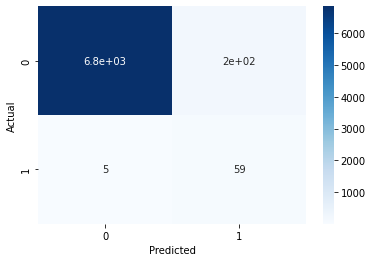

In [47]:
modeling(model,X_train_ros,X_test,y_train_ros,y_test)

### 2. Under-sampling
#### Random UnderSampling

In [48]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('ROS 전 train data: ', X_train.shape, y_train.shape)
print('ROS 후 train data : ', X_train_rus.shape, y_train_rus.shape)
print('레이블 값 분포 : \n', pd.Series(y_train_rus).value_counts())

ROS 전 train data:  (21341, 28) (21341,)
ROS 후 train data :  (348, 28) (348,)
레이블 값 분포 : 
 0    174
1    174
Name: Class, dtype: int64


accuracy : 0.953
precision : 0.152
recall: 0.922
f1-score : 0.260
auc : 0.938
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      7050
           1       0.15      0.92      0.26        64

    accuracy                           0.95      7114
   macro avg       0.58      0.94      0.62      7114
weighted avg       0.99      0.95      0.97      7114



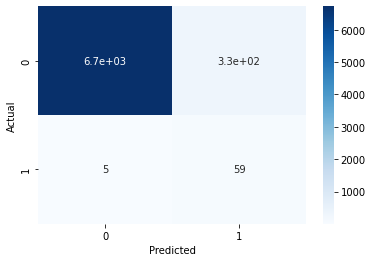

In [49]:
modeling(model,X_train_rus,X_test,y_train_rus,y_test)

### 3. Over-sampling followed by under-sampling
#### SMOTETomek

In [50]:
smt = SMOTETomek(sampling_strategy='auto')
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('ROS 전 train data: ', X_train.shape, y_train.shape)
print('ROS 후 train data : ', X_train_smt.shape, y_train_smt.shape)
print('레이블 값 분포 : \n', pd.Series(y_train_smt).value_counts())

ROS 전 train data:  (21341, 28) (21341,)
ROS 후 train data :  (42334, 28) (42334,)
레이블 값 분포 : 
 0    21167
1    21167
Name: Class, dtype: int64


accuracy : 0.968
precision : 0.211
recall: 0.922
f1-score : 0.344
auc : 0.945
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7050
           1       0.21      0.92      0.34        64

    accuracy                           0.97      7114
   macro avg       0.61      0.95      0.66      7114
weighted avg       0.99      0.97      0.98      7114



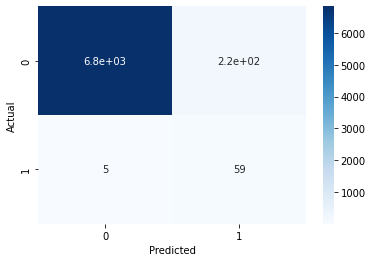

In [51]:
modeling(model,X_train_smt,X_test,y_train_smt,y_test)

- **평가 지표 Recall** <br>
y가 '사기'를 나타내는 변수임과 데이터의 분포가 불균형임을 고려하여<br>
Recall(재현율)기준 SMOTE ,ROS, SMOTETomek이 가장 높은 값을 가지며<br>
ROS에서 accuracy,precision,F1score,auc 모두 가장 높은 값을 보이므로 train data에<br>**Random Over Sampling** 진행 (precision이 낮아지면서 f1score는 기존보다 낮아진 한계 존재)

---

### Cutoff

- **평가 지표 F1 score**

In [52]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [87]:
list = []
for i in np.linspace(0,1,1000):
    y_pred = model.predict_proba(X_test)[:,1] > i
    cf_mtx = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    recall = cf_mtx[0,0] / cf_mtx[0].sum()
    fpr = cf_mtx[1,0] / cf_mtx[1].sum()
    f1 = f1_score(y_test, y_pred) 
    list.append([i, acc, f1, recall, fpr])
 
cut_off = pd.DataFrame(list)
cut_off.columns = ["CUTOFF", "ACC", "F1", "recall", "FPR"]
 
# cut_off별 Performance Evaluation Index
cut_off

,CUTOFF,ACC,F1,recall,FPR
0,0.000000,0.008996,0.017832,0.000000,0.000000
1,0.001001,0.228985,0.022456,0.222128,0.015625
2,0.002002,0.265673,0.023551,0.259149,0.015625
3,0.003003,0.295614,0.024528,0.289362,0.015625
4,0.004004,0.323306,0.025506,0.317305,0.015625
...,...,...,...,...,...
995,0.995996,0.997891,0.878049,0.999291,0.156250
996,0.996997,0.997891,0.878049,0.999291,0.156250
997,0.997998,0.997891,0.878049,0.999291,0.156250
998,0.998999,0.997751,0.868852,0.999291,0.171875


#### ROC curve

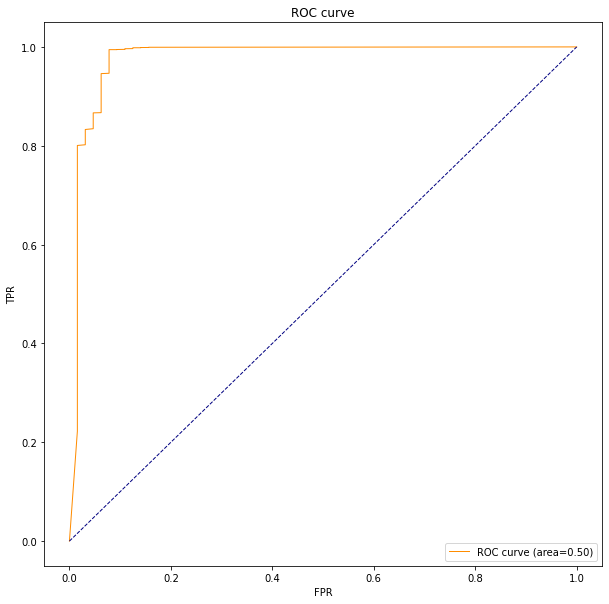

In [88]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thersholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(10,10))
plt.plot(cut_off["FPR"],cut_off["recall"], color="darkorange", lw=1, label="ROC curve (area=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")


In [89]:
# F1 score 최대인 cutoff 값
cut_off[cut_off["F1"] == cut_off["F1"].max()]

,CUTOFF,ACC,F1,recall,FPR
995,0.995996,0.997891,0.878049,0.999291,0.15625
996,0.996997,0.997891,0.878049,0.999291,0.15625
997,0.997998,0.997891,0.878049,0.999291,0.15625


In [90]:
# acc 최대인 cutoff 값
cut_off[cut_off["ACC"] == cut_off["ACC"].max()]

,CUTOFF,ACC,F1,recall,FPR
995,0.995996,0.997891,0.878049,0.999291,0.15625
996,0.996997,0.997891,0.878049,0.999291,0.15625
997,0.997998,0.997891,0.878049,0.999291,0.15625


위의 over sampling된 데이터로 최적 cutoff 측정

In [93]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
model.fit(X_train_ros,y_train_ros)

LogisticRegression()

In [94]:
list = []
for i in np.linspace(0,1,1000):
    y_pred = model.predict_proba(X_test)[:,1] > i
    cf_mtx = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    recall = cf_mtx[0,0] / cf_mtx[0].sum()
    fpr = cf_mtx[1,0] / cf_mtx[1].sum()
    f1 = f1_score(y_test, y_pred) 
    list.append([i, acc, f1, recall, fpr])
 
cut_off = pd.DataFrame(list)
cut_off.columns = ["CUTOFF", "ACC", "F1", "recall", "FPR"]
 
# cut_off별 Performance Evaluation Index
cut_off

,CUTOFF,ACC,F1,recall,FPR
0,0.000000,0.008996,0.017832,0.000000,0.000000
1,0.001001,0.214788,0.022401,0.207660,0.000000
2,0.002002,0.243885,0.023243,0.237021,0.000000
3,0.003003,0.271577,0.023738,0.265106,0.015625
4,0.004004,0.295755,0.024533,0.289504,0.015625
...,...,...,...,...,...
995,0.995996,0.997891,0.878049,0.999291,0.156250
996,0.996997,0.997891,0.878049,0.999291,0.156250
997,0.997998,0.997891,0.878049,0.999291,0.156250
998,0.998999,0.997891,0.878049,0.999291,0.156250


In [96]:
# F1 score 최대인 cutoff 값
cut_off[cut_off["F1"] == cut_off["F1"].max()]

,CUTOFF,ACC,F1,recall,FPR
991,0.991992,0.997891,0.88,0.999149,0.140625
992,0.992993,0.997891,0.88,0.999149,0.140625
993,0.993994,0.997891,0.88,0.999149,0.140625


In [97]:
# acc 최대인 cutoff 값
cut_off[cut_off["ACC"] == cut_off["ACC"].max()]

,CUTOFF,ACC,F1,recall,FPR
991,0.991992,0.997891,0.880000,0.999149,0.140625
992,0.992993,0.997891,0.880000,0.999149,0.140625
993,0.993994,0.997891,0.880000,0.999149,0.140625
994,0.994995,0.997891,0.878049,0.999291,0.156250
995,0.995996,0.997891,0.878049,0.999291,0.156250
996,0.996997,0.997891,0.878049,0.999291,0.156250
997,0.997998,0.997891,0.878049,0.999291,0.156250
998,0.998999,0.997891,0.878049,0.999291,0.156250


최적 cutoff 값이 0.995에서 0.991로 cutoff 값 조정